In [1]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')

In [2]:
!pip install pyspark==2.4.5

     |████████████████████████████████| 217.8MB 163kB/s  eta 0:00:01█▋                           | 31.5MB 8.2MB/s eta 0:00:23              | 71.3MB 29.0MB/s eta 0:00:06��█████▉          | 148.3MB 35.0MB/s eta 0:00:02��███▎    | 185.8MB 42.8MB/s eta 0:00:01
     |████████████████████████████████| 204kB 39.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [3]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [4]:
!pip install pyspark==2.4.5

In [5]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [6]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [7]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-08-09 17:36:05--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-08-09 17:36:05--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-08-09 17:36:06--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [8]:
df = spark.read.parquet('washing.parquet')

In [9]:
df.count()

2058

In [10]:
df.createOrReplaceTempView("washing")
spark.sql("SELECT * FROM washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [75]:
result = spark.sql("select voltage from washing where voltage is not null")
result_array = result.rdd.map(lambda row : row.voltage).sample(False,0.1).collect()

#just print the 1st 15 elements
result_array[:15]

[233, 228, 225, 238, 237, 231, 229, 230, 223, 228, 229, 228, 234, 228, 230]

In [20]:
result1 = spark.sql("select speed from washing where speed is not null")

In [21]:
result_array1 = result1.rdd.map(lambda row : row.speed).sample(False,0.1).collect()

#just print the 1st 15 elements
result_array1[:15]

[1044,
 1037,
 1005,
 1036,
 1076,
 1025,
 1019,
 1018,
 1015,
 1068,
 1077,
 1155,
 1085,
 1082,
 1271]

In [22]:
%matplotlib inline

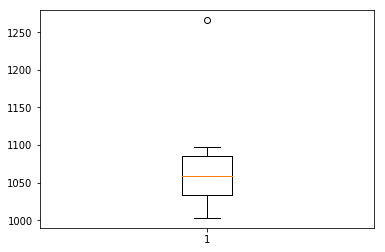

In [23]:
import matplotlib.pyplot as plt
plt.boxplot(result_array)
plt.show()

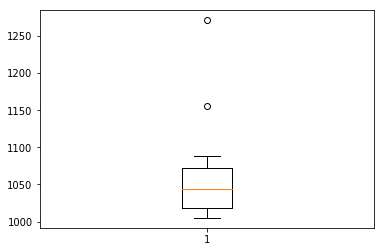

In [24]:
import matplotlib.pyplot as plt
plt.boxplot(result_array1)
plt.show()

In [25]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
print(result_array_ts[:15])
print(result_array_voltage[:15])

[1547808755932, 1547808800960, 1547808806965, 1547808821976, 1547808824978, 1547808827980, 1547808894081, 1547808924097, 1547808951131, 1547808975148, 1547808990168, 1547809005175, 1547809026203, 1547809107251, 1547809146269]
[224, 226, 221, 230, 237, 224, 225, 225, 238, 238, 232, 252, 221, 220, 231]


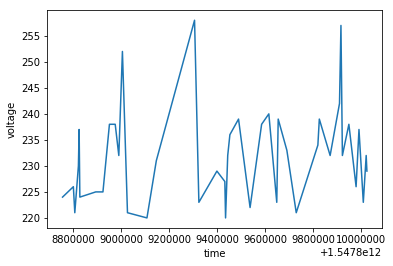

In [30]:
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [31]:
spark.sql("select min(ts),max(ts) from washing").show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



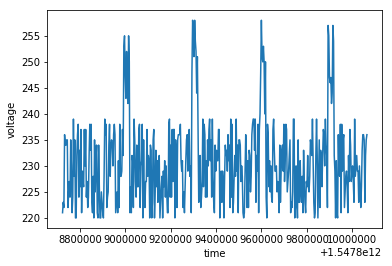

In [32]:
result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""")
result_rdd = result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [34]:

result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()

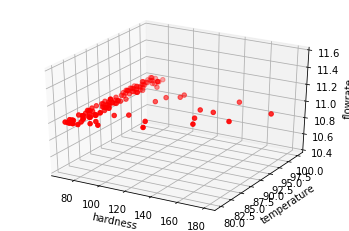

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

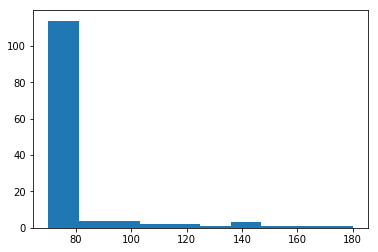

In [36]:
plt.hist(result_array_hardness)
plt.show()

In [48]:
def minTemperature():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    return spark.sql("SELECT min(temperature) as mintemp from washing").first().mintemp

In [49]:

def meanTemperature():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    return spark.sql("SELECT mean(temperature) as meantemp from washing").first().meantemp

In [50]:
def maxTemperature():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    return spark.sql("SELECT max(temperature) as maxtemp from washing").first().maxtemp

In [62]:
def sdTemperature():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/2.3.0/api/sql/
    return spark.sql("SELECT STDDEV(temperature) as sdtemp from washing").first().sdtemp

In [63]:

def skewTemperature():    
    return spark.sql("""
SELECT 
    (
        1/count(*)
    ) *
    SUM (
        POWER(temperature-%s,3)/POWER(%s,3)
    )

as sktemperature from washing
                    """ %(meanTemperature(),sdTemperature())).first().sktemperature

In [64]:

def kurtosisTemperature():    
        return spark.sql("""
SELECT 
    (
        1/count(*)
    ) *
    SUM (
        POWER(temperature-%s,4)/POWER(%s,4)
    )
as ktemperature from washing
                    """ %(meanTemperature(),sdTemperature())).first().ktemperature

In [65]:

def correlationTemperatureHardness():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/2.3.0/api/sql/
    return spark.sql("SELECT corr(temperature,hardness) as temperaturehardness from washing").first().temperaturehardness

In [66]:
df.createOrReplaceTempView("washing")
minTemperature()

80

In [67]:
meanTemperature()

90.03800298062593

In [68]:
max_temperature = maxTemperature()
print(max_temperature)

100


In [69]:
sdTemperature()

6.1007610586219725

In [70]:
skew_temperature = skewTemperature()
print(skew_temperature)

0.00678066991780241


In [74]:
kurtosisTemperature()

1.1564330595125916

In [73]:
correlationTemperatureHardness()

0.017754069047296324

In [76]:
def count():
    #TODO Please enter your code here
    return df.count()

In [77]:
def getNumberOfFields():
    #TODO Please enter your code here
    return len(df.columns)

In [78]:
def getFieldNames():
    #TODO Please enter your code here
    return df.schema.names

In [80]:
count()

2058

In [81]:
getNumberOfFields()

11

In [82]:
getFieldNames()

['_id',
 '_rev',
 'count',
 'flowrate',
 'fluidlevel',
 'frequency',
 'hardness',
 'speed',
 'temperature',
 'ts',
 'voltage']